In [7]:
# import data libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import gdal
print("Data libraries imported!")
# import visualization libraries
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print("Visualization libraries imported!")

Data libraries imported!
Visualization libraries imported!


In [2]:
# Read shape file at "data/DHMVIIDSMRAS1m_k05/DHMVII_vdc_k5/DHMVII_vdc_k5.shp"
dataset = gpd.read_file("data/DHMVIIDSMRAS1m_k05/DHMVII_vdc_k5/DHMVII_vdc_k5.shp")

In [3]:
# Preview data
dataset.head()

,Date,OpnDatum1,OpnDatum2,geometry
0,20140319,2014-03-19,None,"POLYGON Z ((86000.000 230206.366 0.000, 85998...."
1,20140317,2014-03-19,2014-03-17,"POLYGON Z ((86000.000 230206.366 0.000, 86000...."
2,20140317,2014-03-17,None,"MULTIPOLYGON Z (((97000.000 228000.000 0.000, ..."
3,20140317,2014-03-17,2014-03-30,"MULTIPOLYGON Z (((95075.940 227675.980 0.000, ..."
4,20140330,2014-03-30,None,"POLYGON Z ((87000.000 227360.941 0.000, 87000...."


<AxesSubplot:>

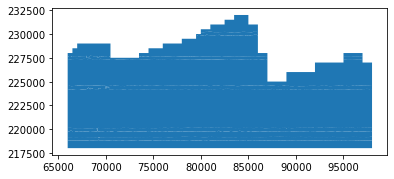

In [4]:
# Basic plot
dataset.plot()

In [15]:
# reading tif file for 3D plot attempt
dem = gdal.Open("data/DHMVIIDSMRAS1m_k05.tif")
gt = dataset2.GetGeoTransform()
dem = dataset2.ReadAsArray()

AttributeError: 'numpy.ndarray' object has no attribute 'GetGeoTransform'

AttributeError: type object 'object' has no attribute '__getattr__'

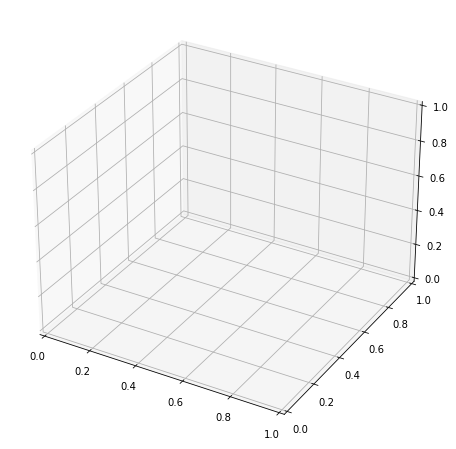

In [16]:
# copied from https://stackoverflow.com/questions/17713050/display-a-georeferenced-dem-surface-in-3d-matplotlib
# trial run revealed: buggy, needs work (it's a start though)
fig, ax = plt.subplots(figsize=(16,8), subplot_kw={'projection': '3d'})

xres = gt[1]
yres = gt[5]

X = np.arange(gt[0], gt[0] + dem.shape[1]*xres, xres)
Y = np.arange(gt[3], gt[3] + dem.shape[0]*yres, yres)

X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X,Y,dem, rstride=1, cstride=1, cmap=plt.cm.RdYlBu_r, vmin=0, vmax=4000, linewidth=0, antialiased=True)

ax.set_zlim(0, 60_000)
ax.view_init(60, -105)

fig.colorbar(surf, shrink=0.4, aspect=20)

In [ ]:
# Let's try another approach
# First a general 3d scatter plotting excercise
# Source: http://chris35wills.github.io/courses/PythonPackages_matplotlib/matplotlib_3d/
xyz=np.array(np.random.random((100,3)))
x = xyz[:,0]
y = xyz[:,1]
z = xyz[:,2]*100
